In [1]:
import os
import keras
import random
from keras.applications.inception_v3 import preprocess_input# import inception_v3 as inc_net
from keras.preprocessing import image
from keras.models import load_model
from skimage.io import imread
from skimage.segmentation import mark_boundaries
#from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

print('Notebook run using keras:', keras.__version__)

Using TensorFlow backend.


Notebook run using keras: 2.1.6


In [2]:
img_size = 299
data_type = 'mushrooms24'
path_to_labels = os.path.join('labels', data_type+'.txt')
file_name = os.path.join('trainedModels',
                         data_type,
                         'completetrain',
                         '05-07-18 22:24__Epochs12_Steps376_ImageSize299_BatchSize64')
def getHighestID(preds):
    id = 0
    max = -1
    for i in range(len(preds)):
        if preds[i]>max:
            max = preds[i]
            id=i
    return id

def getLabels():
    with open(path_to_labels, 'r') as f:
     myLabels = [line.strip() for line in f]
    return myLabels

def getLabelById(id):
    with open(path_to_labels) as fp:
        for i, line in enumerate(fp):
            if i == id:
                return line
    raise Exception('ID is not in file')
    
def decode_prediction(preds):
    label_list = getLabels()    
    decoded_list = list()
    decoded_list.append([])
    for i in range(len(label_list)):
        decoded_list[0].append([label_list[i],preds[i]])
    return decoded_list

def getIdByLabel(label):
    with open(path_to_labels) as fp:
        for i, line in enumerate(fp):
            if label == line.replace('\n',''):
                return i
    raise Exception('Label is not in file')

def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(img_size, img_size))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        out.append(x)
    return np.vstack(out)

def getRandomImage():
    dir_list = [x[0] for x in os.walk(os.path.join('data',data_type,'test'))][1:]
    output = list()
    only_paths = list()
    for x in dir_list:
        output.append([random.choice(os.listdir(x)),os.path.basename(x)])
        only_paths.append(os.path.join(x,random.choice(os.listdir(x))))
    return output, only_paths    


In [3]:
my_model = load_model(file_name+".h5")
print('Model loaded> '+file_name)

Model loaded> trainedModels/mushrooms24/completetrain/05-07-18 22:24__Epochs12_Steps376_ImageSize299_BatchSize64


In [4]:
output, images_paths = getRandomImage()
images = transform_img_fn(images_paths)
"""
if data_type == 'mushrooms24':    
    images = transform_img_fn([os.path.join('data','Amanita muscaria.jpg'),
                           os.path.join('data','Tylopilus felleus.jpg'),
                           os.path.join('data','Suillus grevillei var. grevillei.jpg'),
                           os.path.join('data','Tricholomopsis rutilans.jpg'),
                           os.path.join('data','Xerocomus subtomentosus.jpg'),
                           os.path.join('data','Lepista nuda.jpg')
                          ])
elif data_type == 'flowers':
    
    images = transform_img_fn([os.path.join('data','daisy.jpg'),
                           os.path.join('data','danelion.jpg'),
                           os.path.join('data','rose.jpg'),
                           os.path.join('data','sunflowers.jpg'),
                           os.path.join('data','tulips.jpg')
                          ])
"""
preds = my_model.predict(images)

['Polyporus squamosus', 0.9391118]
['Agaricus augustus', 0.05739455]
['Armillaria mellea', 0.00311537]
['Amanita phalloides', 0.0001437801]
['Amanita muscaria', 0.00012178057]
False


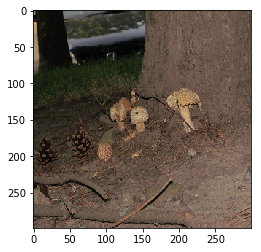

['Amanita muscaria', 0.9999994]
['Amanita phalloides', 6.032731e-07]
['Agaricus augustus', 2.8776004e-11]
['Boletus eduils', 2.1825007e-11]
['Coprinus comatus', 1.9927119e-11]
True


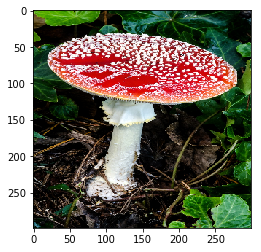

['Amanita phalloides', 0.9999963]
['Amanita muscaria', 3.447916e-06]
['Lepista nuda', 2.1392441e-07]
['Agaricus augustus', 8.1448215e-10]
['Coprinus comatus', 3.8292054e-11]
True


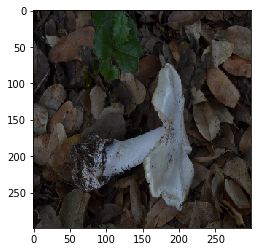

['Armillaria mellea', 0.9965546]
['Suillus luteus', 0.0027536922]
['Amanita phalloides', 0.0006559357]
['Agaricus augustus', 3.4139415e-05]
['Hypholoma fasciculare', 5.055052e-07]
True


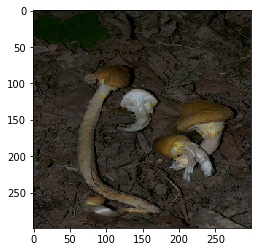

['Boletus eduils', 0.57874787]
['Suillus luteus', 0.25940537]
['Armillaria mellea', 0.12805958]
['Amanita phalloides', 0.03139989]
['Tylopilus felleus', 0.0016797952]
True


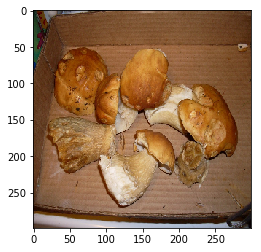

['Coprinus comatus', 1.0]
['Amanita phalloides', 1.5167421e-08]
['Agaricus augustus', 1.1905545e-08]
['Armillaria mellea', 5.6465996e-09]
['Polyporus squamosus', 1.0976497e-09]
True


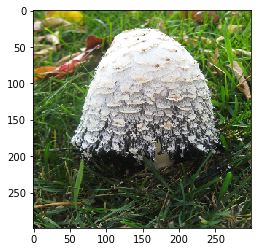

['Dentinum repandum', 0.94735885]
['Lepista nuda', 0.023691075]
['Amanita phalloides', 0.019484272]
['Paxillus atrotomentosus', 0.009344279]
['Hypholoma fasciculare', 4.299883e-05]
True


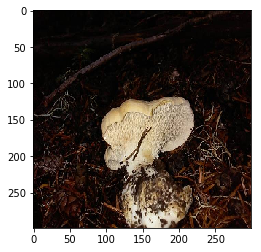

['Lepista nuda', 0.99993956]
['Galerina unicolor', 5.3393003e-05]
['Amanita phalloides', 2.3517173e-06]
['Hypholoma fasciculare', 2.2404488e-06]
['Psathyrella candolleana', 1.4192838e-06]
False


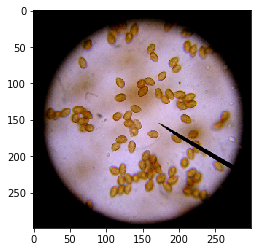

['Gyromitra esculenta', 0.9999653]
['Armillaria mellea', 3.099148e-05]
['Suillus luteus', 3.6369024e-06]
['Lepista nuda', 5.182363e-08]
['Hygrophoropsis aurantiaca', 3.8984307e-08]
True


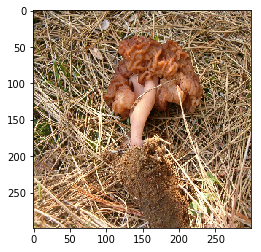

['Hygrophoropsis aurantiaca', 0.999987]
['Paxillus atrotomentosus', 1.0144066e-05]
['Lactarius volemus', 2.7029298e-06]
['Lepista nuda', 8.280814e-08]
['Galerina unicolor', 1.6451027e-08]
True


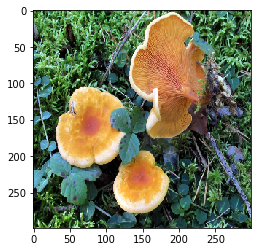

['Hypholoma fasciculare', 0.6542452]
['Marasmius oreades', 0.3428606]
['Psathyrella candolleana', 0.0027908084]
['Amanita phalloides', 3.269253e-05]
['Morganella pyriformis', 3.2561657e-05]
True


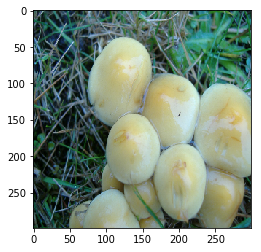

['Lactarius volemus', 0.99999976]
['Hygrophoropsis aurantiaca', 1.9434503e-07]
['Suillus luteus', 4.477509e-08]
['Lepista nuda', 3.4962113e-08]
['Tylopilus felleus', 4.5926485e-09]
True


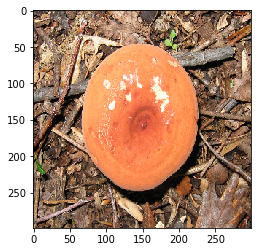

['Lepista nuda', 1.0]
['Paxillus atrotomentosus', 7.177586e-10]
['Armillaria mellea', 5.916702e-10]
['Gyromitra esculenta', 5.1438983e-12]
['Paxillus involutus', 3.0679493e-12]
True


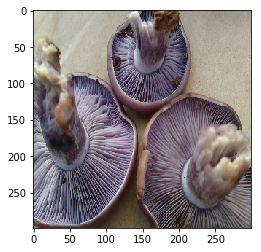

['Lycoperdon perlatum', 0.74280655]
['Suillus luteus', 0.1953444]
['Tricholomopsis rutilans', 0.03766515]
['Armillaria mellea', 0.008835678]
['Agaricus augustus', 0.0049878843]
True


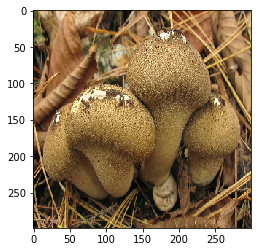

['Marasmius oreades', 1.0]
['Psilocybe semilanceata', 2.6948839e-09]
['Armillaria mellea', 4.3627443e-10]
['Psathyrella candolleana', 3.6925138e-10]
['Galerina unicolor', 1.9537504e-10]
True


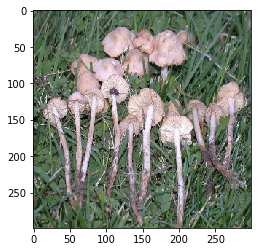

['Lycoperdon perlatum', 0.6600106]
['Morganella pyriformis', 0.31650668]
['Polyporus squamosus', 0.010785339]
['Paxillus atrotomentosus', 0.00493272]
['Tylopilus felleus', 0.0038940804]
False


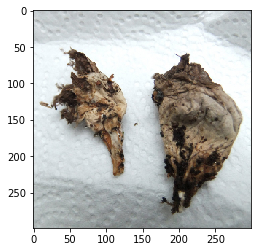

['Paxillus atrotomentosus', 0.9999949]
['Dentinum repandum', 5.0668154e-06]
['Armillaria mellea', 1.5734885e-08]
['Lepista nuda', 1.4927524e-08]
['Lactarius volemus', 4.733317e-09]
True


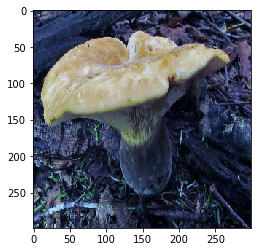

['Paxillus atrotomentosus', 0.7311881]
['Hygrophoropsis aurantiaca', 0.26143968]
['Tricholomopsis rutilans', 0.004890304]
['Dentinum repandum', 0.0017370401]
['Paxillus involutus', 0.00062038115]
False


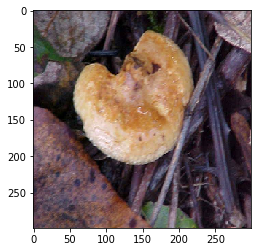

['Polyporus squamosus', 1.0]
['Tricholomopsis rutilans', 6.6243946e-14]
['Agaricus augustus', 4.4974732e-14]
['Coprinus comatus', 1.2197885e-14]
['Galerina unicolor', 3.5140297e-15]
True


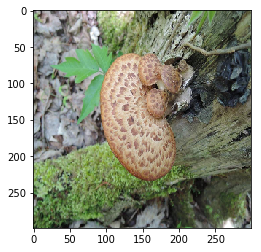

['Armillaria mellea', 0.99934727]
['Psathyrella candolleana', 0.000652655]
['Hypholoma fasciculare', 1.11858874e-07]
['Psilocybe semilanceata', 4.2930175e-09]
['Amanita phalloides', 1.4908804e-09]
False


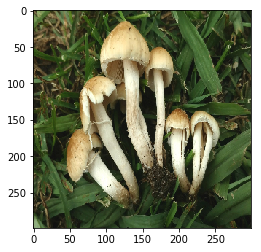

['Marasmius oreades', 0.9856941]
['Psilocybe semilanceata', 0.014301568]
['Hypholoma fasciculare', 3.6078231e-06]
['Galerina unicolor', 6.8016874e-07]
['Armillaria mellea', 2.0466029e-08]
False


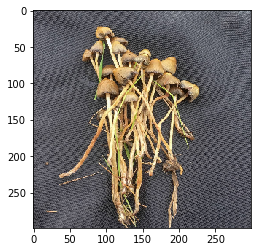

['Suillus luteus', 0.9999404]
['Tylopilus felleus', 5.9506732e-05]
['Amanita phalloides', 6.412926e-08]
['Lepista nuda', 2.2832423e-09]
['Boletus eduils', 2.741285e-10]
True


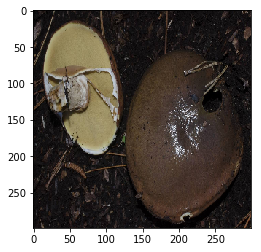

['Tricholomopsis rutilans', 0.9999367]
['Lactarius volemus', 6.3234744e-05]
['Lepista nuda', 4.470127e-08]
['Amanita phalloides', 3.193821e-08]
['Armillaria mellea', 2.8156572e-08]
True


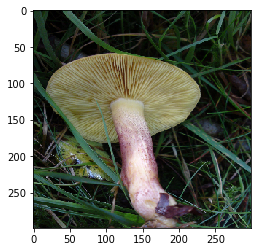

['Tylopilus felleus', 0.99939775]
['Lactarius volemus', 0.0005992024]
['Dentinum repandum', 1.4872033e-06]
['Suillus luteus', 1.3053099e-06]
['Lepista nuda', 1.2127572e-07]
True


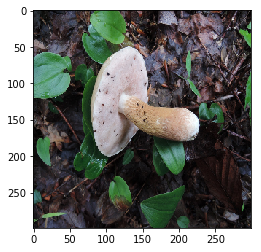

In [5]:
for i in range(len(images)):
    preds_with_labels = decode_prediction(preds[i])[0]
    preds_with_labels = sorted(preds_with_labels,key=lambda l:l[1], reverse=True)
    plt.figure()
    plt.imshow(images[i]/2 +0.5)    
    for x in preds_with_labels[:5]:
        print(x)
    isright = True if preds_with_labels[0][0] == output[i][1] else False
    print(isright)
    plt.show()

In [6]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

In [7]:
explainer = lime_image.LimeImageExplainer()

In [8]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explantions = list()
for image in images:
    explantions.append(explainer.explain_instance(image, my_model.predict, hide_color=None, num_samples=1000))

CPU times: user 5min 5s, sys: 34.2 s, total: 5min 39s
Wall time: 5min 23s


Polyporus squamosus
 / 


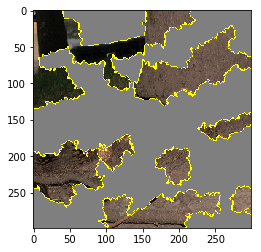

Amanita muscaria
 / 


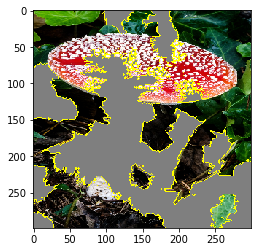

Amanita phalloides
 / 


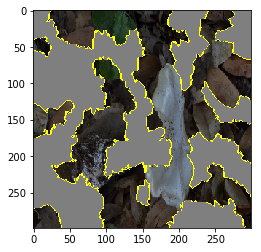

Armillaria mellea
 / 


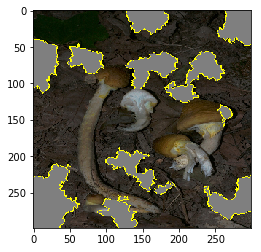

Boletus eduils
 / 


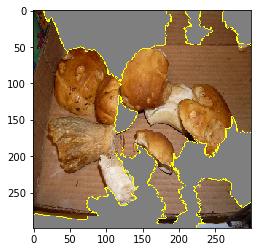

Coprinus comatus
 / 


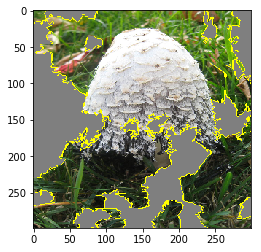

Dentinum repandum
 / 


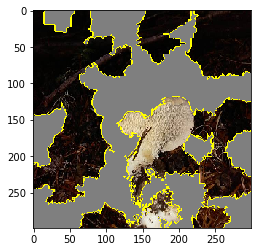

Lepista nuda
 / 


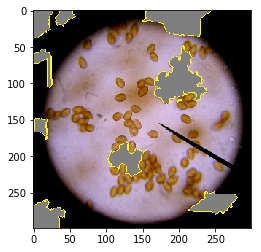

Gyromitra esculenta
 / 


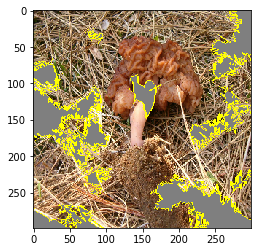

Hygrophoropsis aurantiaca
 / 


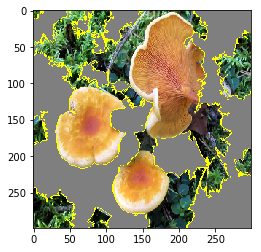

Hypholoma fasciculare
 / 


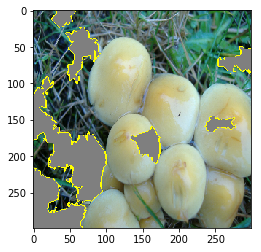

Lactarius volemus
 / 


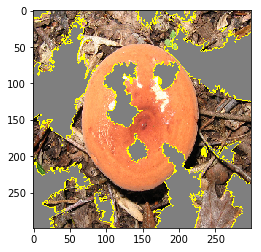

Lepista nuda
 / 


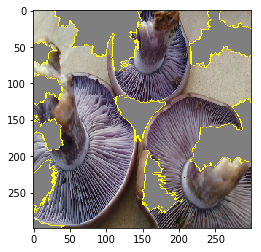

Lycoperdon perlatum
 / 


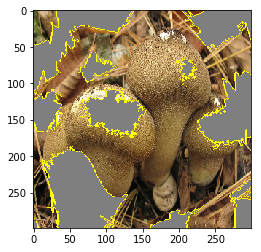

Marasmius oreades
 / 


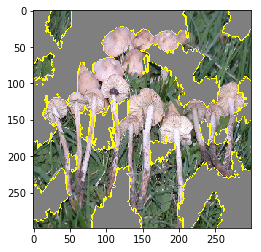

Lycoperdon perlatum
 / 


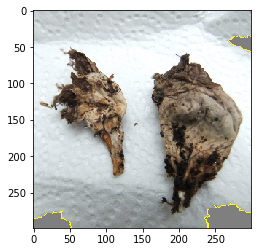

Paxillus atrotomentosus
 / 


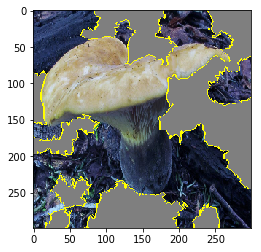

Paxillus atrotomentosus
 / 


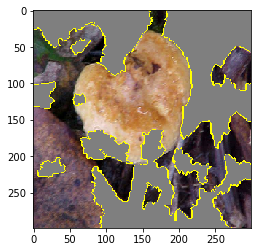

Polyporus squamosus
 / 


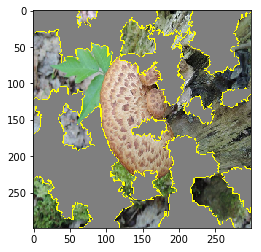

Armillaria mellea
 / 


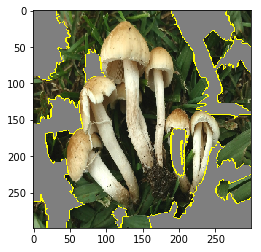

Marasmius oreades
 / 


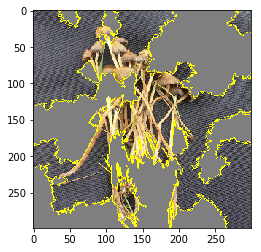

Suillus luteus
 / 


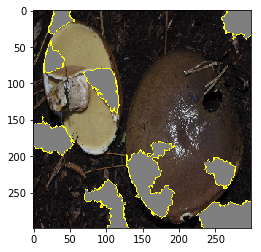

Tricholomopsis rutilans
 / 


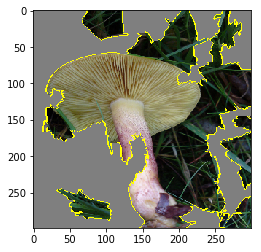

Tylopilus felleus
 / 


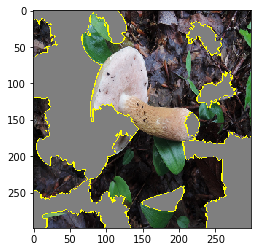

In [11]:
for i in range(len(explantions)):
    temp, mask = explantions[i].get_image_and_mask(getHighestID(preds[i]),
                                                   positive_only=True,
                                                   hide_rest=True,
                                                   num_features=1000)
    print(getLabelById(getHighestID(preds[i])) + " / ") #ToDO: getFileName
    plt.figure()
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.show()